In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [15]:
data=pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
x=data.drop(columns=['HeartDisease'],axis=1)
y=pd.DataFrame(data['HeartDisease'])
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [17]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


# Data exploration and preprocessing 

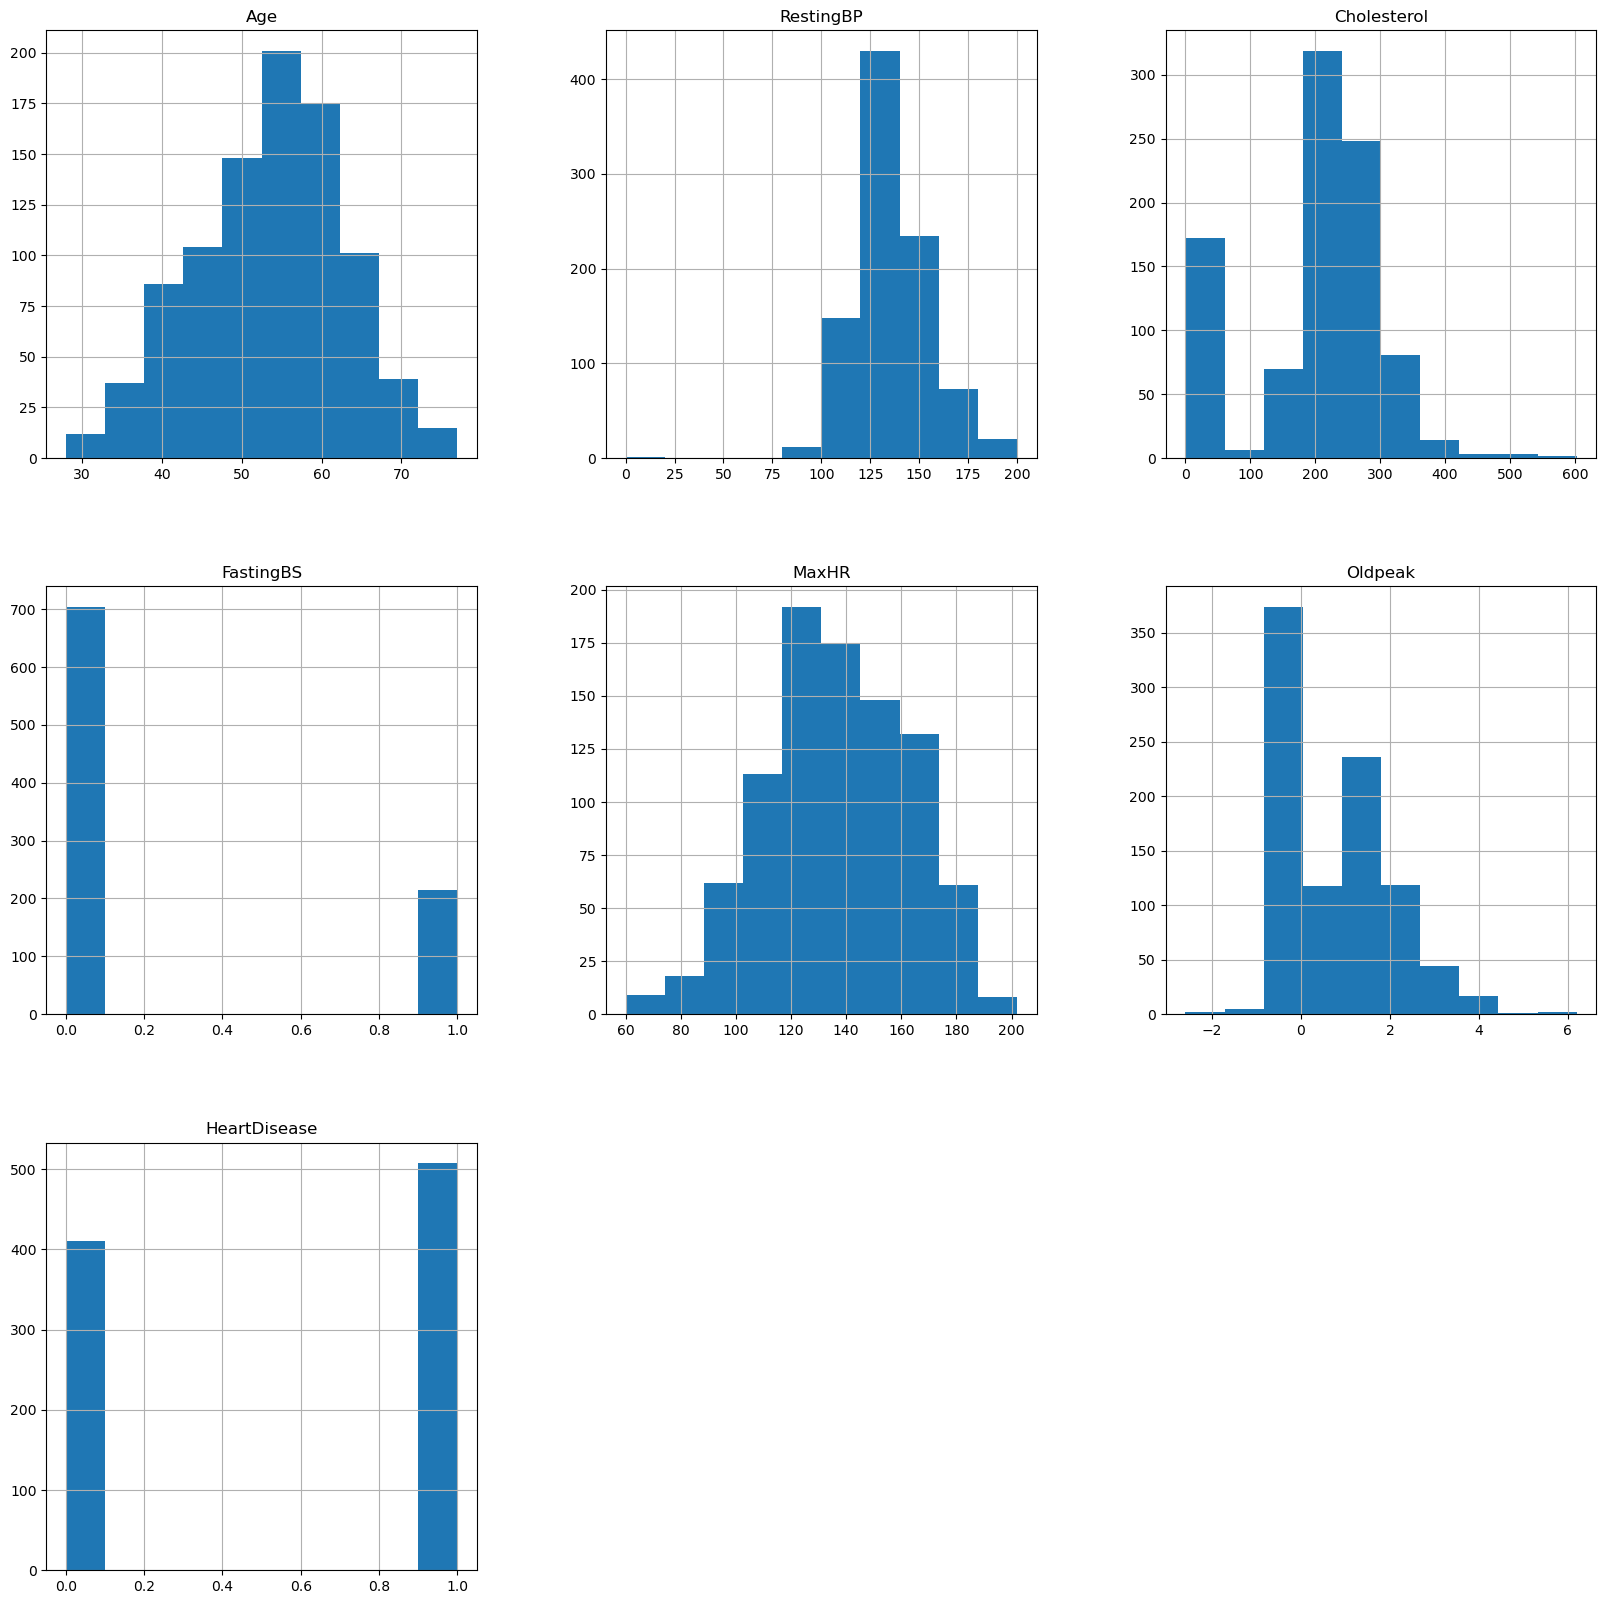

In [18]:
data.hist(bins=10,figsize=(20,20))
plt.show()

age, restingbp and cholestrol and oldpeak are skewed 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


 Thus there are no missing values 

 and 

 sex, chestpaintype,restingecg,exerciseangina,st_slope are catgeorical variables

In [20]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


There might be some outliers in data 

In [21]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Not much of a difference in number of 1 and 0 in target variable means dataset is balanced dataset

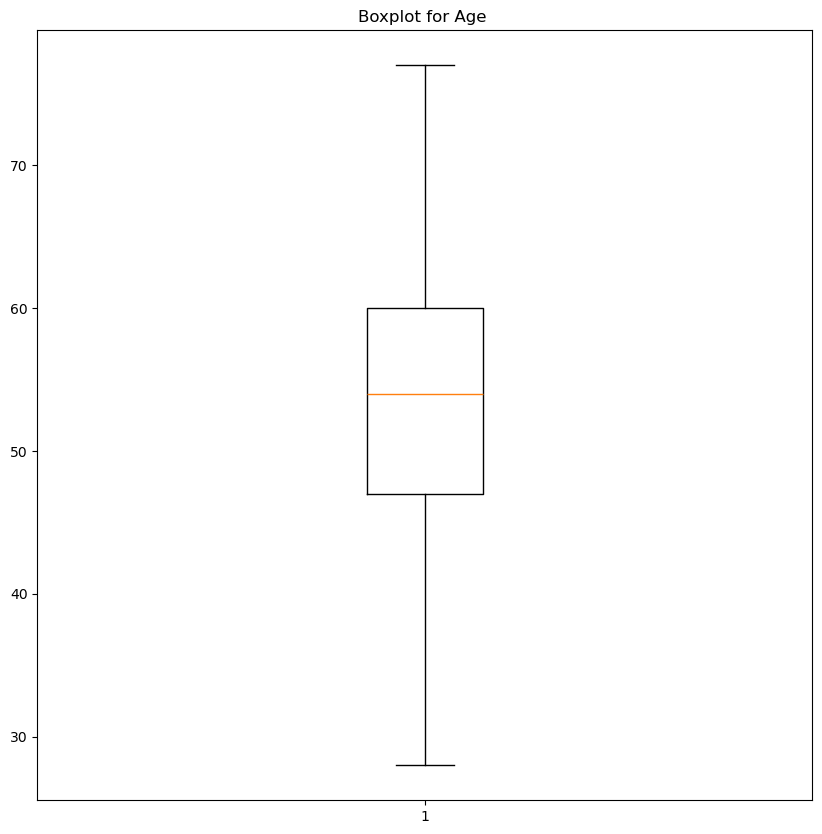

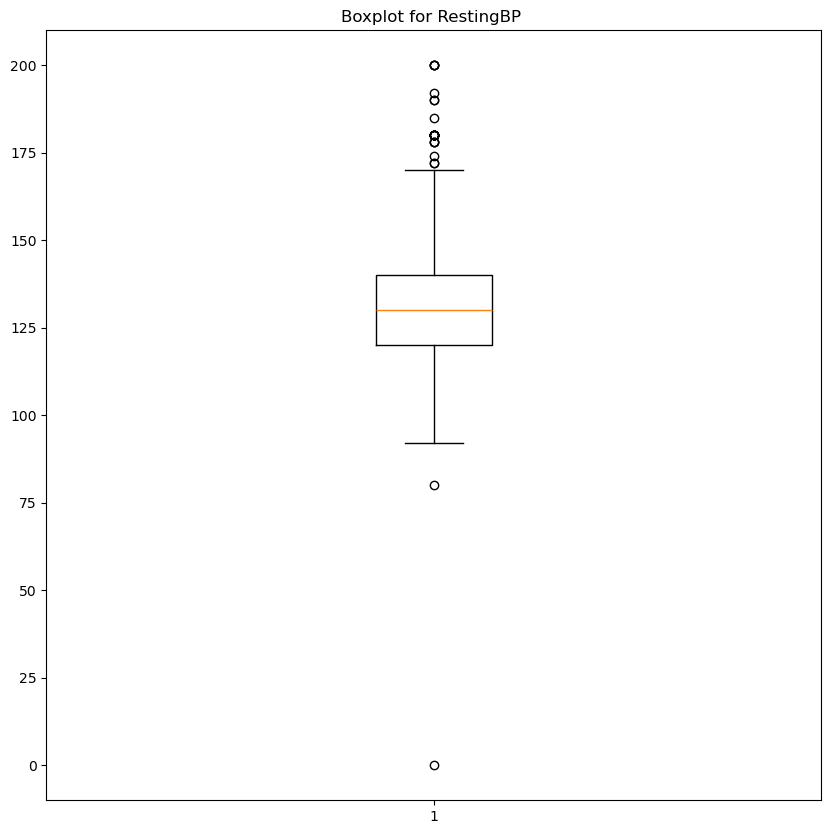

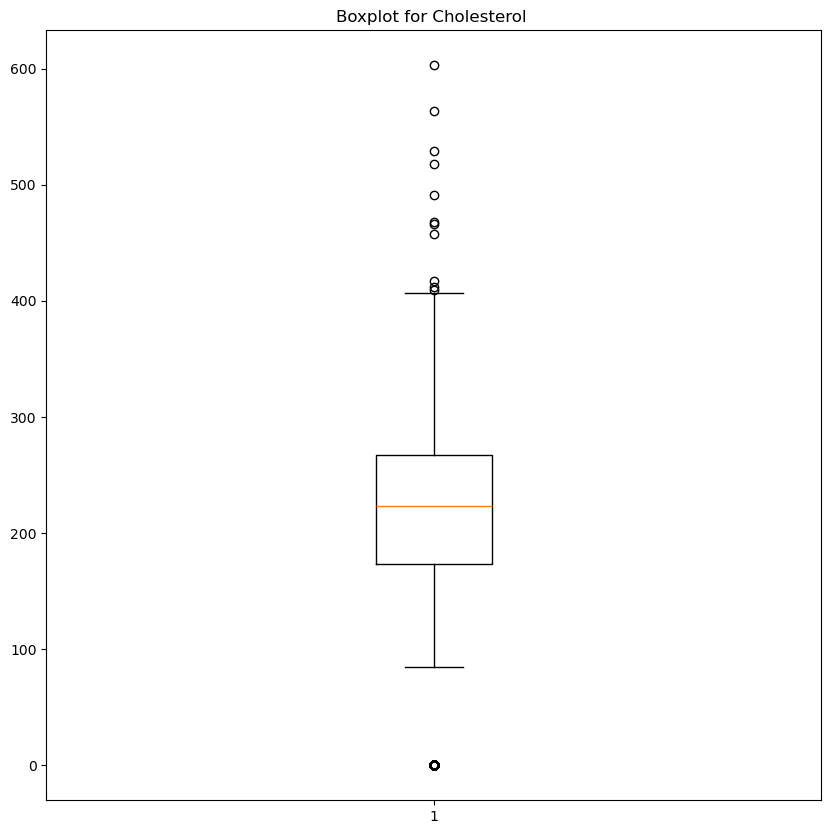

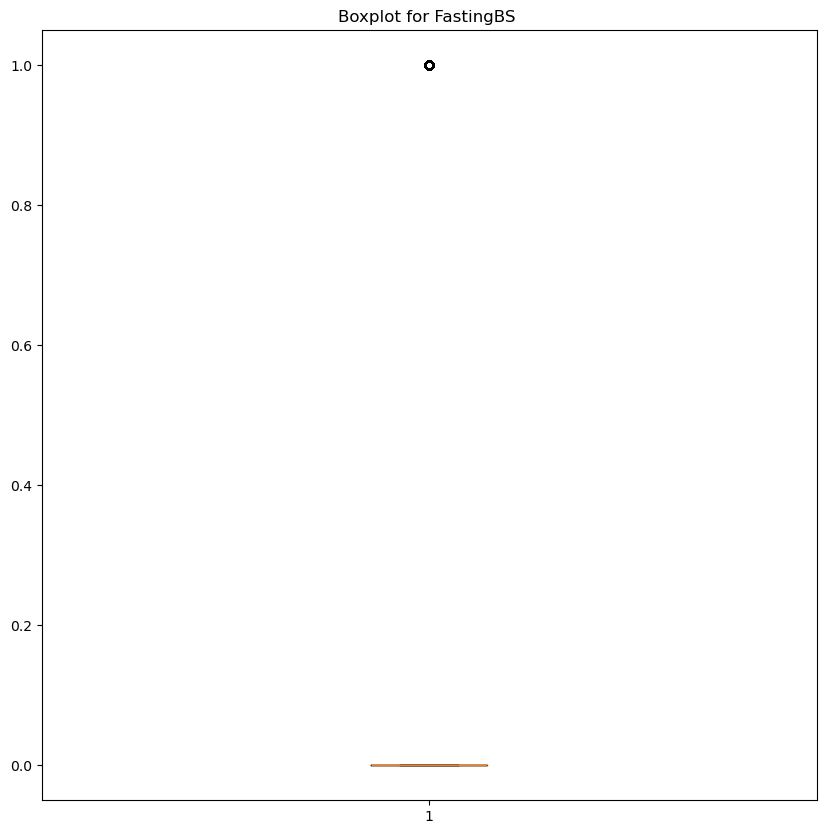

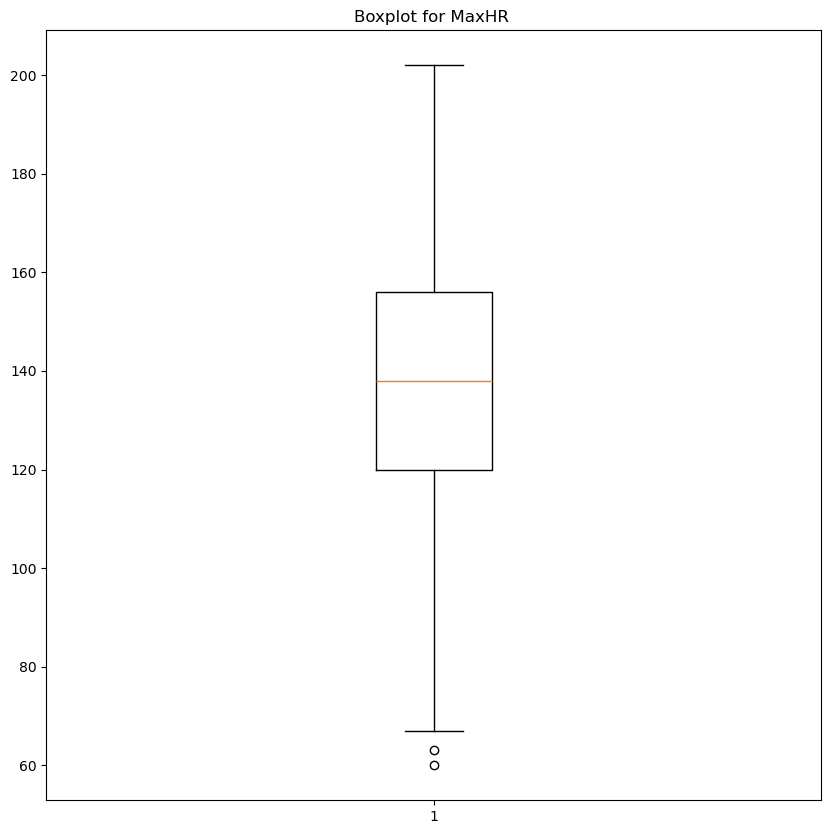

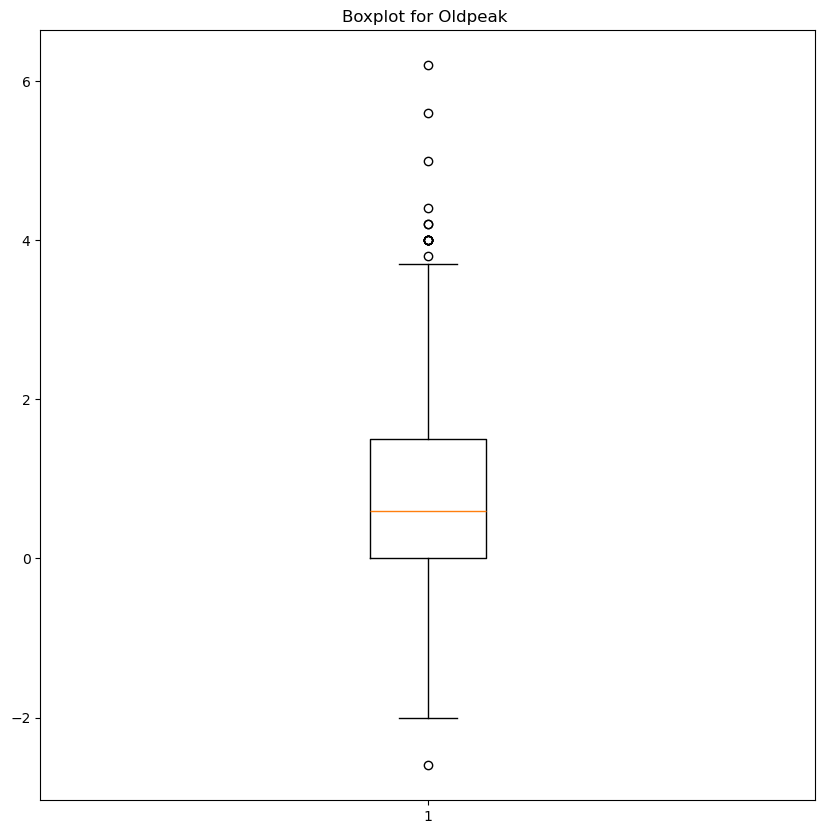

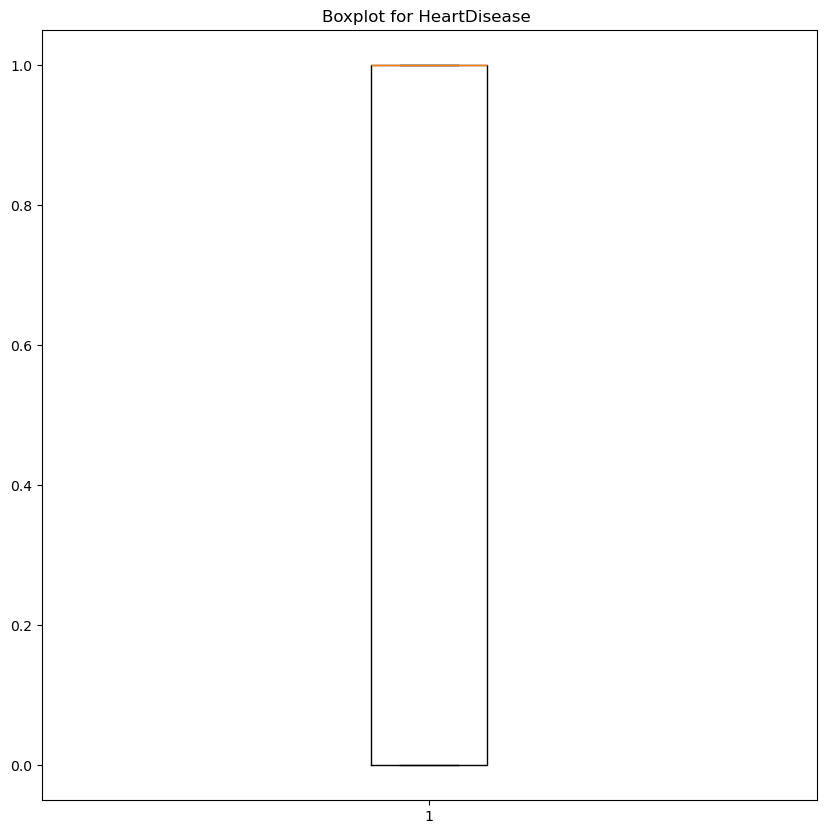

In [22]:
num_columns = data.select_dtypes(include=['int64', 'float64']).columns
for i in num_columns:
    plt.figure(figsize=(10,10))
    plt.boxplot(data[i])
    plt.title(f"Boxplot for {i} ")

Thus, from above graphs, we can say that RestingBP,Choleserol,FastingBS,MAXHR,oldpeak  have outliers in them so treat them in pipeline later

# Now let's see about correlation

In [23]:
corr_mat=data.corr(numeric_only=True)
corr_mat

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [24]:
corr_mat['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

As, we can see Oldpeak and Max Hr are more related to our target variable 

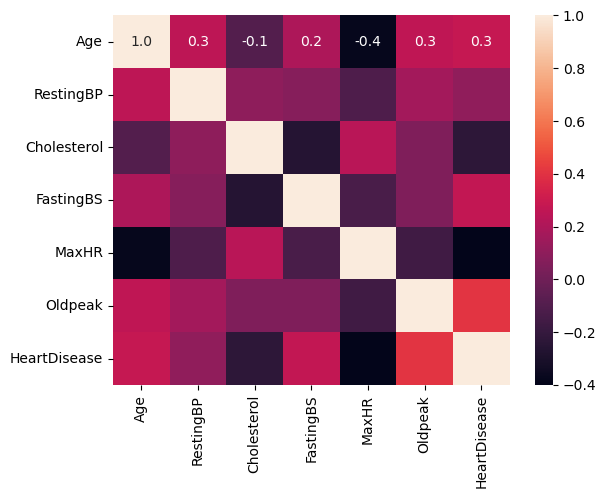

In [25]:
sns.heatmap(corr_mat,annot=True,fmt=".1f")
plt.show()

# Data preprocessing 

In [26]:
def outlier_treatment():
    outlier_treatment_columns = ["RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
    for i in outlier_treatment_columns:
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        
        # Replace outliers with upper or lower limit
        data[i] = data[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
        
    return data

# Call the function to apply outlier treatment
data = outlier_treatment()

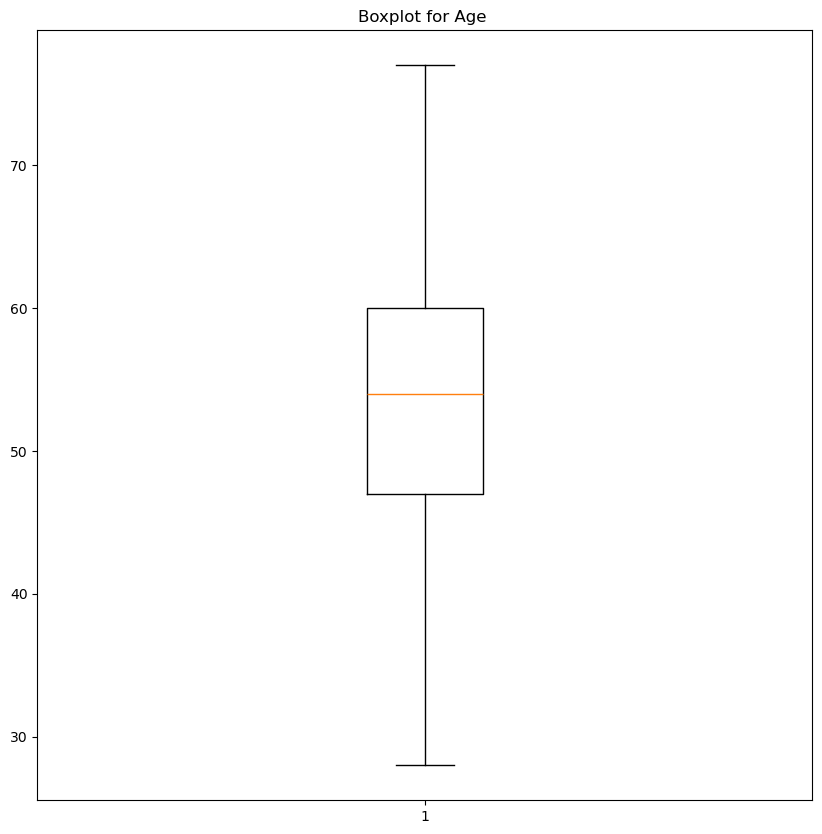

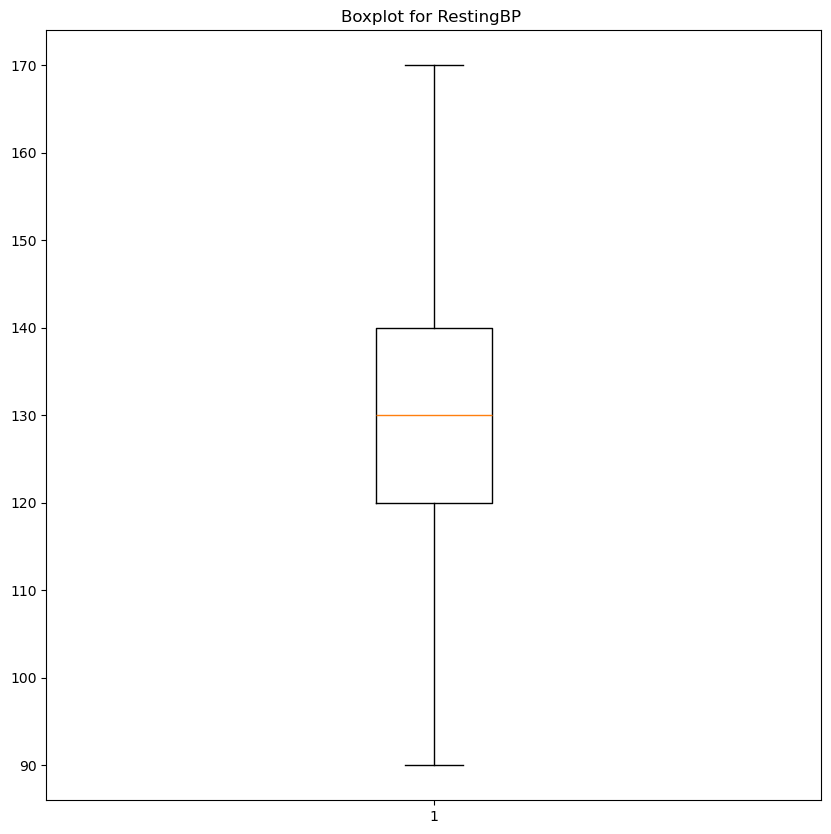

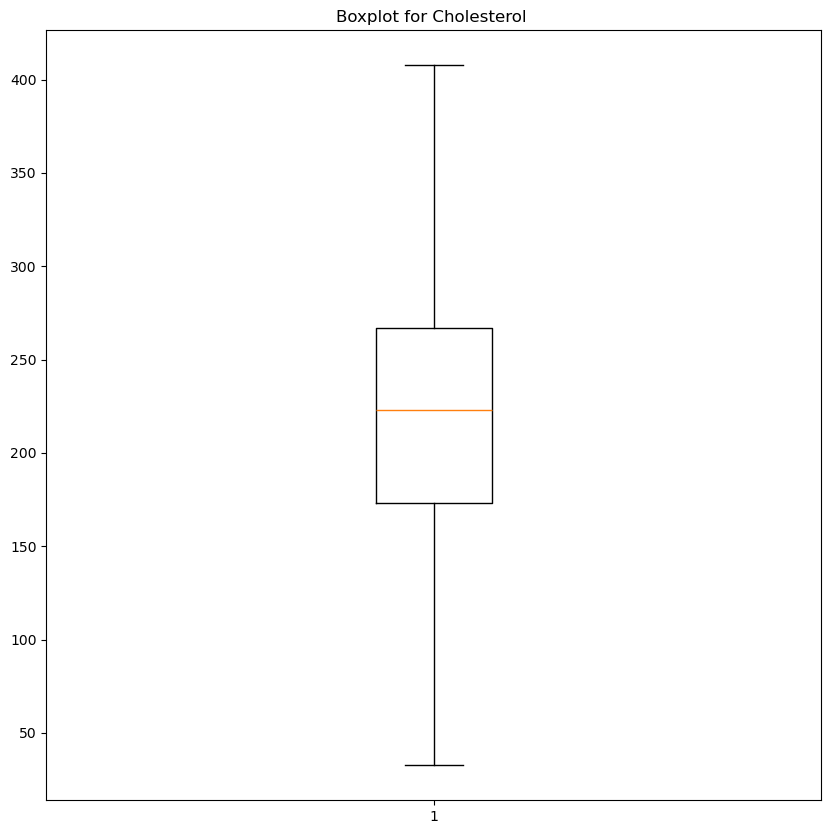

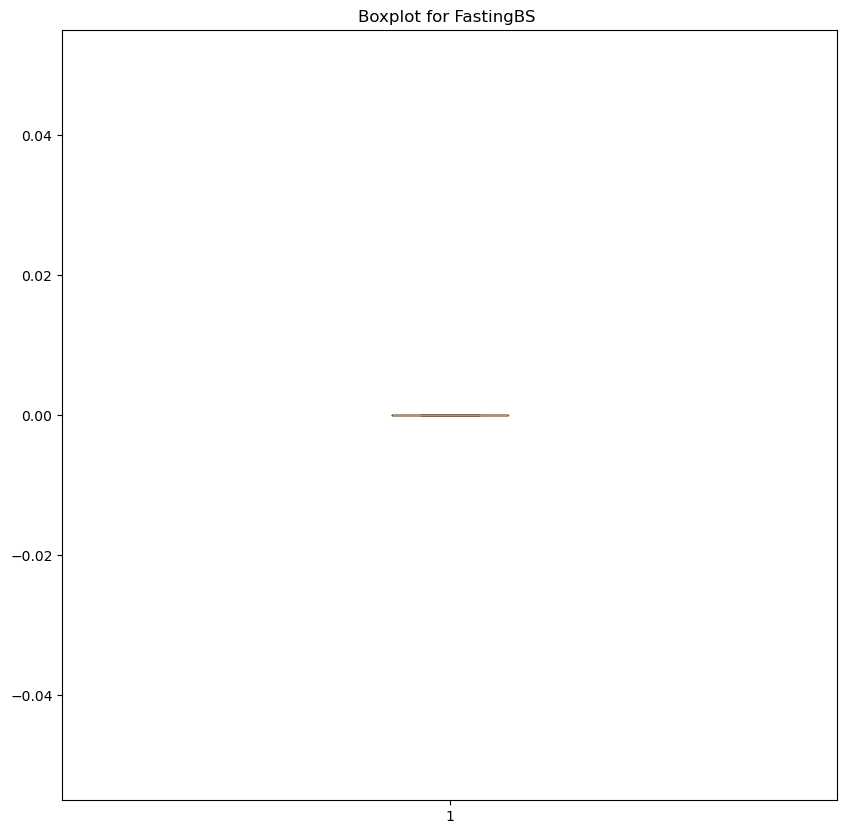

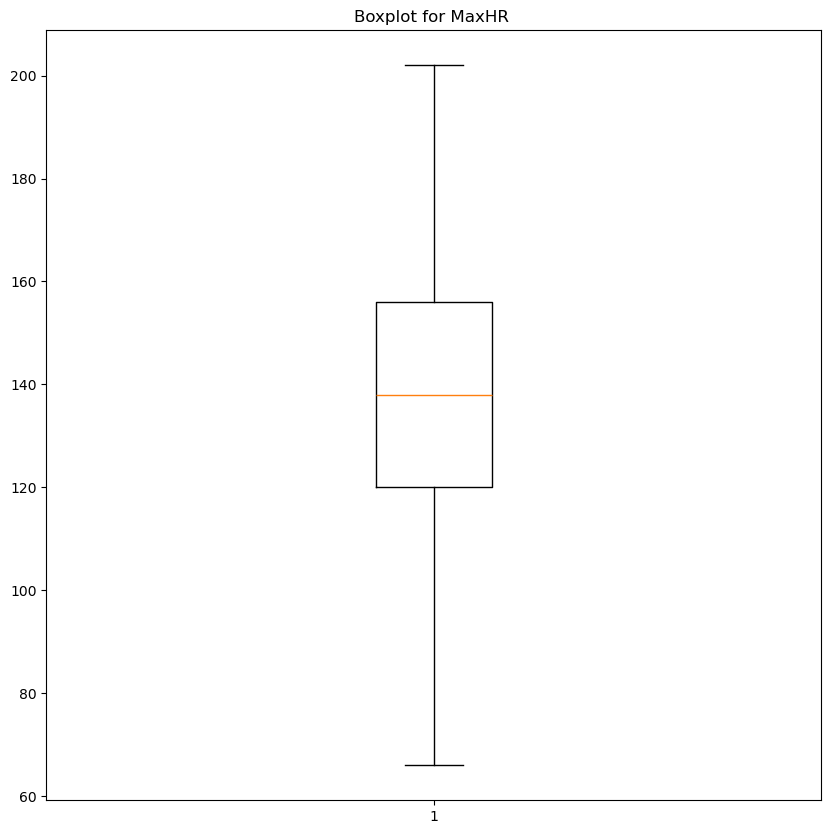

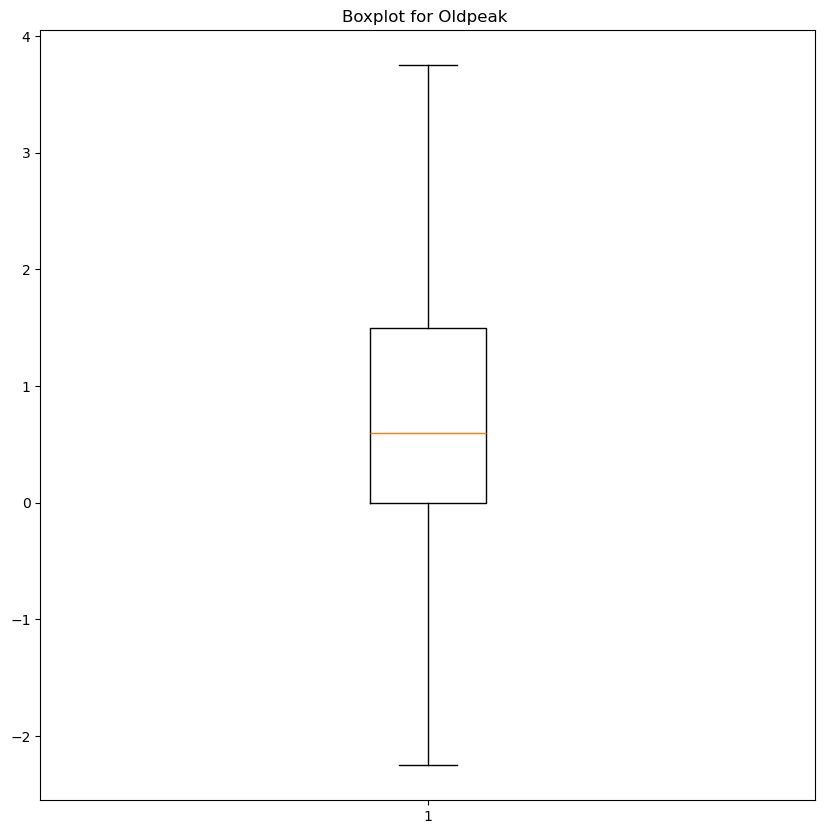

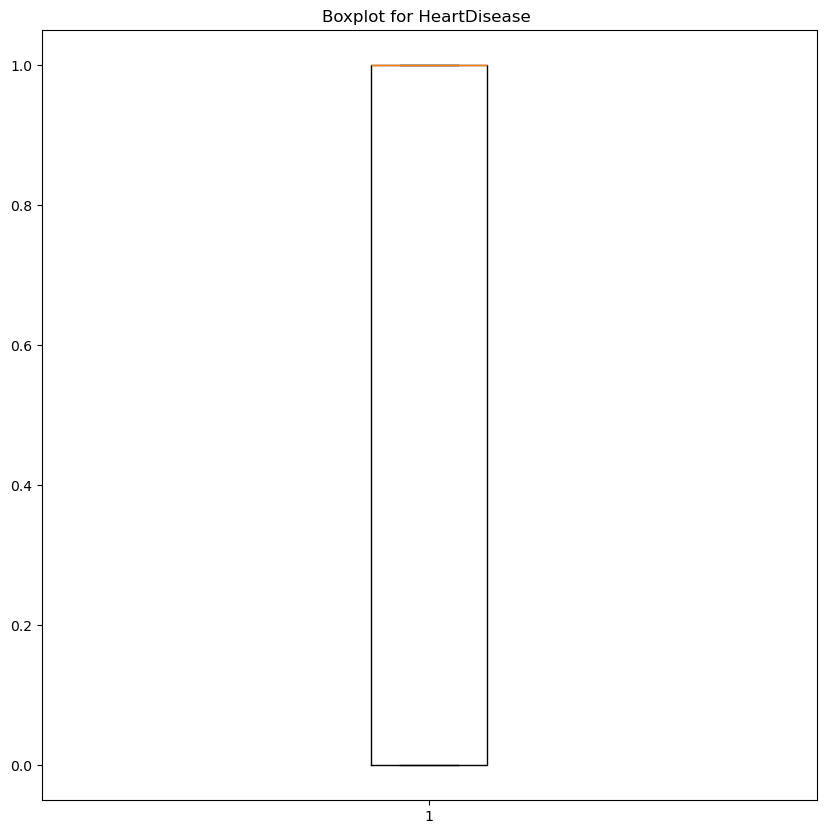

In [27]:
for i in num_columns:
    plt.figure(figsize=(10,10))
    plt.boxplot(data[i])
    plt.title(f"Boxplot for {i} ")

As, you can see that outliers are treated 

# Now let's talk about data distribution

In [28]:
skew_value=data[num_columns].skew().sort_values(ascending=False)
skew_value

Oldpeak         0.816956
RestingBP       0.268093
FastingBS       0.000000
MaxHR          -0.136355
Age            -0.195933
HeartDisease   -0.215086
Cholesterol    -0.610829
dtype: float64

-> Positive value means the distribution is skewed to the right.
-> 
Negative value means the distribution is skewed to the left

.-> 
0 means perfect normal distribution. The bell shaped curve.


In [29]:
right_skewed_continous_columns=['RestingBP','Oldpeak']
Left_skewed_continous_columns=['Age','MaxHR','Cholesterol']

# Let's Try log transformer for distubuting normal data 

C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


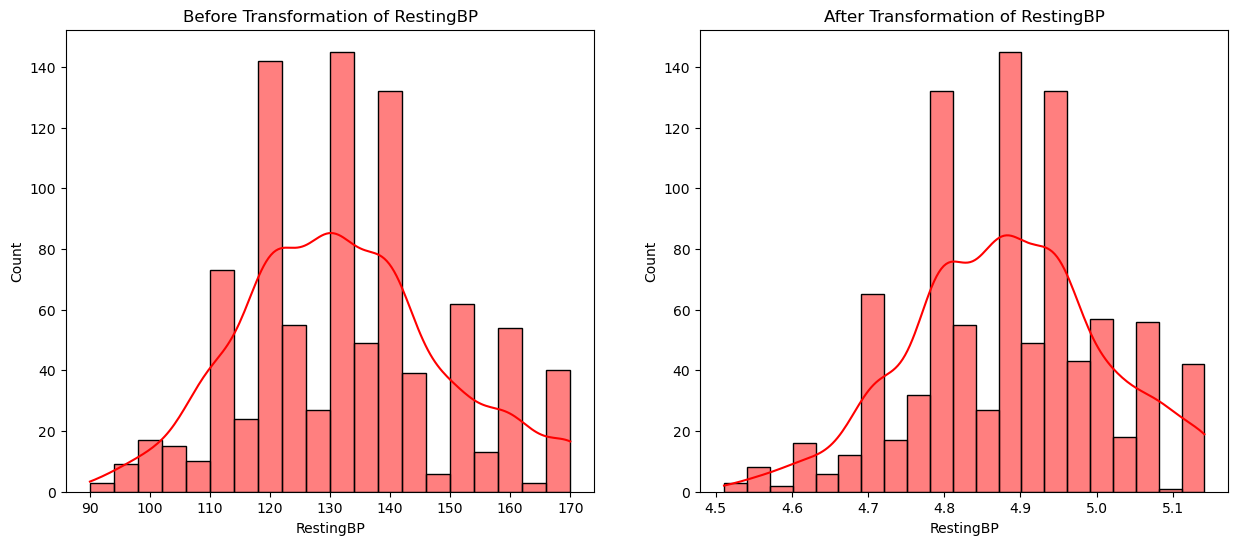

C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RAHUL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


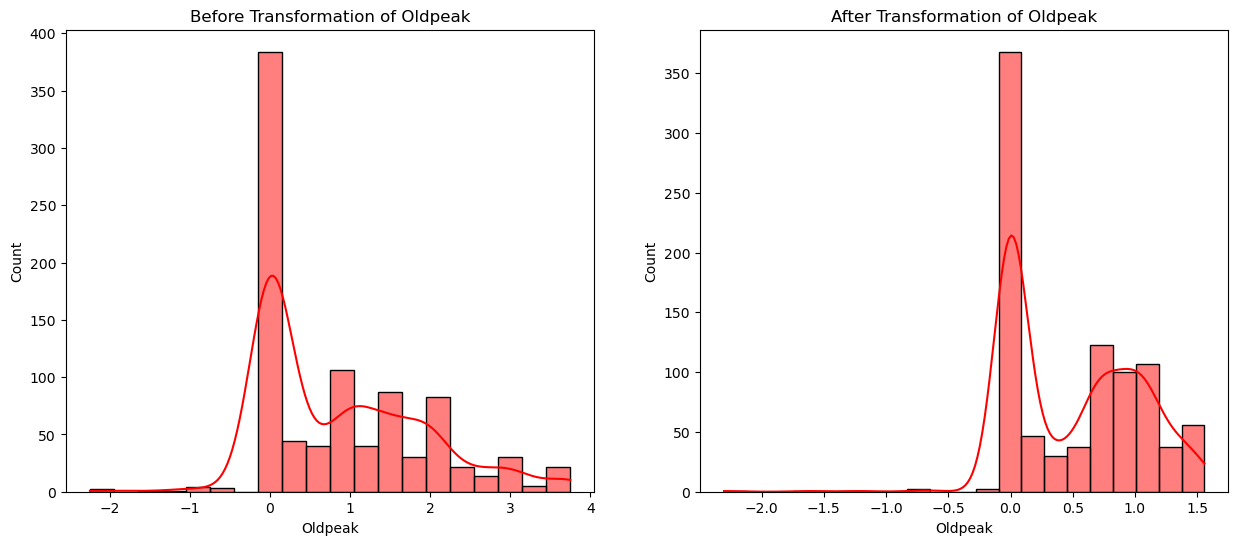

In [30]:
def log_transform_visualization(right_skewed_continous_columns):
    for i in right_skewed_continous_columns:
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        sns.histplot(data[i],kde=True,color='red')
        plt.title(f"Before Transformation of {i}")
        
        data[i] = np.log1p(data[i])
        plt.subplot(1,2,2)
        sns.histplot(data[i],kde=True,color='red')
        plt.title(f"After Transformation of {i}")
        plt.show()

log_transform_visualization(right_skewed_continous_columns)

C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


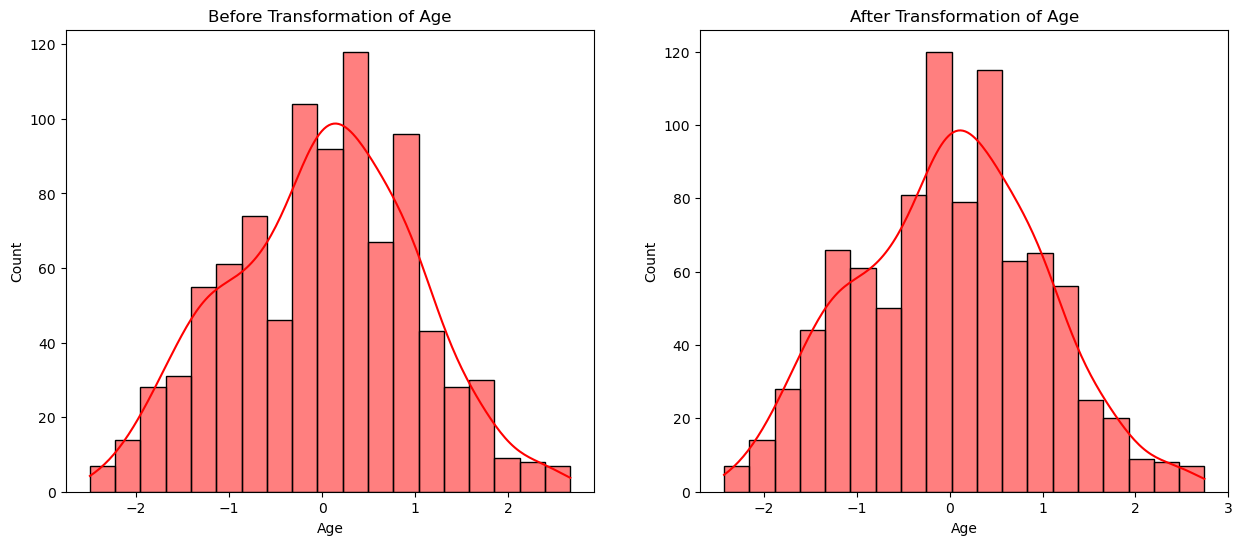

C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


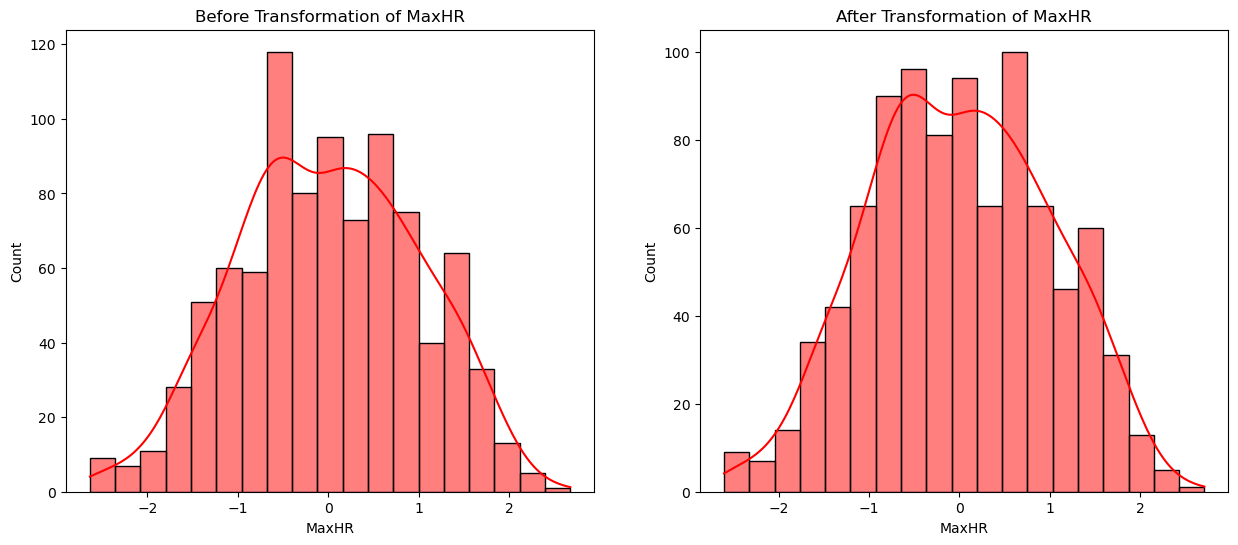

C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RAHUL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


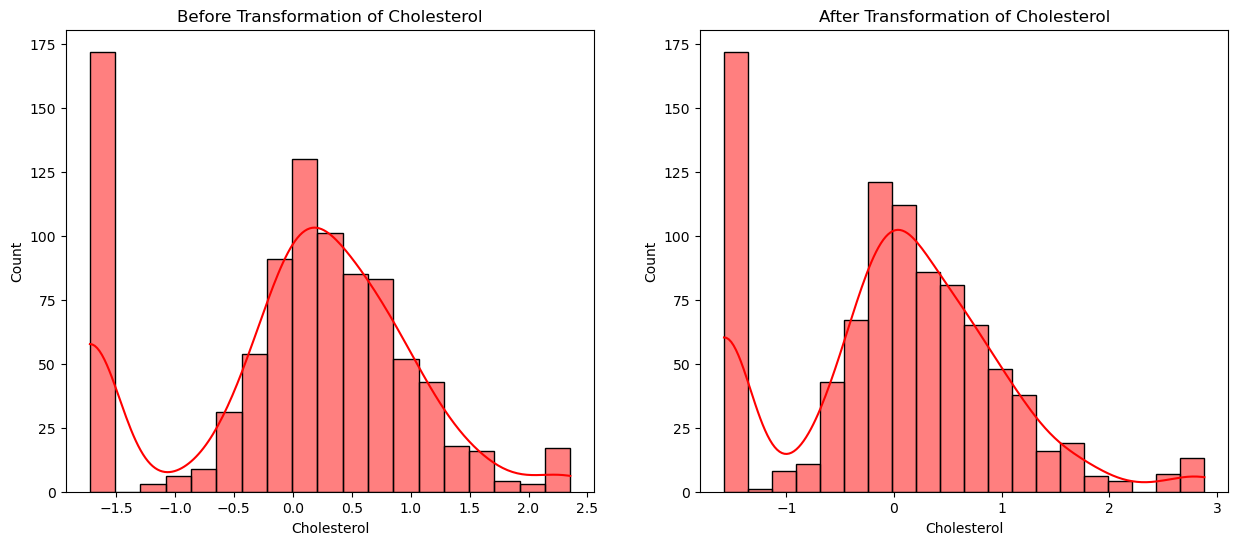

In [31]:
from sklearn.preprocessing import PowerTransformer
boxcoxTr = PowerTransformer(standardize=True)
for i in Left_skewed_continous_columns:
    data[i]=(boxcoxTr.fit_transform(data[i].values.reshape(-1,1)))
def power_transform_visualization(Left_skewed_continous_columns):
    for i in Left_skewed_continous_columns:
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        sns.histplot(data[i],kde=True,color='red')
        plt.title(f"Before Transformation of {i}")
        
        data[i]=(boxcoxTr.fit_transform(data[i].values.reshape(-1,1)))
        plt.subplot(1,2,2)
        sns.histplot(data[i],kde=True,color='red')
        plt.title(f"After Transformation of {i}")
        plt.show()

power_transform_visualization(Left_skewed_continous_columns)

In [32]:
data[num_columns].skew().sort_values(ascending=False)

C:\Users\RAHUL\anaconda3\Lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


Cholesterol     0.102099
Age             0.024771
FastingBS       0.000000
MaxHR          -0.014824
RestingBP      -0.060159
HeartDisease   -0.215086
Oldpeak              NaN
dtype: float64

# Now let's deal with categorical variables 

In [33]:
cat_columns=data.select_dtypes(include=['object']).columns
cat_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [34]:
data[cat_columns]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


 We can do one hot encoding on these categorical variables

In [35]:
from sklearn.preprocessing import OneHotEncoder
def onehotencode(data,cat_columns):
    for i in cat_columns:
        one_hot_encoder = OneHotEncoder()
        encoded_columns = one_hot_encoder.fit_transform(data[i].values.reshape(-1,1)).toarray()
        encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out([i]))
        data = pd.concat([data, encoded_df], axis=1)
        data=data.drop(i,axis=1)
    return data
transformed_data=onehotencode(data,cat_columns)
transformed_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.393717,4.948760,0.924241,0.0,1.413894,0.000000,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.518479,5.081404,-0.414903,0.0,0.746570,0.693147,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.667439,4.875197,0.837967,0.0,-1.496178,0.000000,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.619793,4.934474,-0.051958,0.0,-1.130299,0.916291,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.004424,5.017280,-0.260664,0.0,-0.603510,0.000000,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.917556,4.709530,0.573697,0.0,-0.216928,0.788457,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,1.613143,4.976734,-0.281728,0.0,0.138578,1.481605,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,0.332062,4.875197,-0.867181,0.0,-0.869003,0.788457,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.332062,4.875197,0.210235,0.0,1.498562,0.000000,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
transformed_data.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              4
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [37]:
# Deletion of missing values in another copy 

In [38]:
transformed_data_1=transformed_data.copy()
transformed_data_1['Oldpeak'].replace([np.inf, -np.inf], np.nan, inplace=True)
transformed_data_1.dropna(subset=['Oldpeak'],axis=0,inplace=True)

In [39]:
transformed_data_1['Oldpeak'].unique()

array([ 0.        ,  0.69314718,  0.91629073,  1.09861229,  1.38629436,
        1.55814462,  0.40546511,  1.25276297,  0.58778666,  0.53062825,
        0.87546874,  1.13140211,  0.33647224,  0.18232156,  0.99325177,
        1.16315081,  0.09531018,  0.95551145,  0.83290912,  0.26236426,
        1.02961942,  1.28093385, -2.30258509,  1.33500107, -0.10536052,
        0.64185389,  0.74193734,  1.22377543, -1.2039728 , -1.60943791,
        1.54756251,  0.78845736, -0.69314718,  1.06471074,  1.5040774 ,
        0.47000363,  1.41098697,  1.19392247,  1.48160454,  1.5260563 ,
        1.43508453,  1.36097655])

In [40]:
from sklearn.impute import SimpleImputer
transformed_data_2=transformed_data.copy()
transformed_data_2['Oldpeak'].replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy ='mean')
transformed_data_2['Oldpeak'] = imputer.fit_transform(transformed_data_2['Oldpeak'].values.reshape(-1, 1))

# Data Splitting

In [41]:
x=transformed_data_2.drop(columns=['HeartDisease'],axis=1)
y=pd.DataFrame(transformed_data_2['HeartDisease'])
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((734, 20), (184, 20), (734, 1), (184, 1))

# Model Building 

In [42]:
x_train.shape[1]

20

1. Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model1=lr.fit(x_train,y_train)
predict1=lr.predict(x_test)

C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance Evaluation

In [44]:
score = lr.score(x_test, y_test)
print(score)

0.8315217391304348


In [45]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, predict1)

0.8958333333333334

In [46]:
recall_score(y_test, predict1)

0.8037383177570093

In [47]:
from sklearn.metrics import f1_score

f1_score(y_test, predict1)

0.8472906403940886

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predict1)

0.8369340939434396

2. DecisionTree

In [49]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
model2=decision_tree.fit(x_train,y_train)
predict2=decision_tree.predict(x_test)
score2 = decision_tree.score(x_test, y_test)
print(score2)

0.8097826086956522


In [50]:
precision_score(y_test, predict2)

0.8829787234042553

In [51]:
recall_score(y_test, predict2)

0.7757009345794392

In [52]:
f1_score(y_test, predict2)

0.8258706467661693

In [53]:
roc_auc_score(y_test, predict2)

0.8164218958611482

3. XGboost

In [54]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()
model3=xgboost.fit(x_train,y_train)
predict3=xgboost.predict(x_test)
score3 = xgboost.score(x_test, y_test)
print(score3)

0.875


In [55]:
precision_score(y_test, predict3)

0.9038461538461539

In [56]:
recall_score(y_test, predict3)

0.8785046728971962

In [57]:
f1_score(y_test, predict3)

0.8909952606635071

In [58]:
roc_auc_score(y_test, predict3)

0.8743172715135331

# Neural Network

In [59]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

In [60]:
x_train.shape

(734, 20)

In [76]:
NN=keras.Sequential(
    [
        keras.Input(shape=[x_train.shape[1]]),
        layers.Flatten(),
        layers.Dense(32,activation='relu'),
        layers.Dense(1,activation="sigmoid"),
    ]
)

NN.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'],
)

NN=keras.models.load_model('saved_nn_model/heart_nn_model.keras')
NN.fit(x_train,y_train,epochs=100,verbose=2)
NN.evaluate(x_test,y_test,verbose=2)

Epoch 1/100
23/23 - 1s - 49ms/step - accuracy: 0.8815 - loss: 0.2829
Epoch 2/100
23/23 - 0s - 2ms/step - accuracy: 0.8828 - loss: 0.2827
Epoch 3/100
23/23 - 0s - 2ms/step - accuracy: 0.8856 - loss: 0.2832
Epoch 4/100
23/23 - 0s - 3ms/step - accuracy: 0.8910 - loss: 0.2827
Epoch 5/100
23/23 - 0s - 3ms/step - accuracy: 0.8869 - loss: 0.2812
Epoch 6/100
23/23 - 0s - 3ms/step - accuracy: 0.8869 - loss: 0.2816
Epoch 7/100
23/23 - 0s - 2ms/step - accuracy: 0.8856 - loss: 0.2806
Epoch 8/100
23/23 - 0s - 2ms/step - accuracy: 0.8856 - loss: 0.2812
Epoch 9/100
23/23 - 0s - 3ms/step - accuracy: 0.8883 - loss: 0.2808
Epoch 10/100
23/23 - 0s - 2ms/step - accuracy: 0.8869 - loss: 0.2798
Epoch 11/100
23/23 - 0s - 3ms/step - accuracy: 0.8910 - loss: 0.2788
Epoch 12/100
23/23 - 0s - 3ms/step - accuracy: 0.8856 - loss: 0.2782
Epoch 13/100
23/23 - 0s - 3ms/step - accuracy: 0.8869 - loss: 0.2781
Epoch 14/100
23/23 - 0s - 3ms/step - accuracy: 0.8856 - loss: 0.2777
Epoch 15/100
23/23 - 0s - 3ms/step - accur

[0.32255029678344727, 0.8913043737411499]

In [75]:
import os
os.makedirs('saved_nn_model',exist_ok=True)
NN.save('saved_nn_model/heart_nn_model.keras')

# Till now best is XGboost in ml models

# Now let's try hypertuning

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found: ", best_params)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best cross-validation accuracy: 0.87
